In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('coursea_data.csv')

In [3]:
num_features = df.shape[1]
num_features

7

*Is the number of features*

<h1 style="color:white;background-color:blue;padding:10px; border-radius:10px; text-align:center"> Làm sạch dữ liệu </h1>

In [4]:
df.dropna(inplace=True) #Bỏ tất cả các hàng chứa giá trị null
df.drop_duplicates(inplace=True) #loại bỏ các hàng trùng nhau
df=df.drop("Unnamed: 0",axis=1) #Xóa bro cột đầu tiên (không cân thiết)

<h1 style="color:white;background-color:blue;padding:10px; border-radius:10px; text-align:center"> Vài thống kê cơ bản về dataset </h1>

<span style="color:red">Thay đổi giá trị course_students_enrolled thành intergers thuận tiện hơn cho việc xử lí </span>

In [5]:
df.course_students_enrolled.replace(r'[km]+$', '', regex=True).astype(float)
df['course_students_enrolled']=(df.course_students_enrolled.replace(r'[km]+$', '', regex=True).astype(float)*df.course_students_enrolled.str.extract(r'[\d\.]+([km]+)', expand=False).replace(['k','m'], [10**3, 10**6])).astype('int64')
df['course_students_enrolled']

0        5300
1       17000
2      130000
3       91000
4      320000
        ...  
886     52000
887     21000
888     30000
889      9800
890     38000
Name: course_students_enrolled, Length: 891, dtype: int64

In [6]:
df.info() #Info of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 48.7+ KB


In [7]:
include =['object', 'float', 'int']
df.describe(include=include[0]).T

,count,unique,top,freq
course_title,891,888,Developing Your Musicianship,2
course_organization,891,154,University of Pennsylvania,59
course_Certificate_type,891,3,COURSE,582
course_difficulty,891,4,Beginner,487


In [8]:
df.describe(include=include[1])

,course_rating
count,891.000000
mean,4.677329
std,0.162225
min,3.300000
25%,4.600000
50%,4.700000
75%,4.800000
max,5.000000


In [9]:
print('Median của course rating: ')
df['course_rating'].median()

Median của course rating: 


4.7

**Giá trị trung bình của course_rating khá cao (4.7) trong khoảng thu được là 3.3 - 5.0, tuy nhiên giá trị trung bình và median lại tương đồng**

<p style="color:purple; font-weight:bold"> Mức độ rating khóa học là một phân phối chuẩn, k bị sai lệch => Nên dựa vào cho việc phân tích về các khóa học </p>

<h1 style="color:white;background-color:blue;padding:10px; border-radius:10px; text-align:center">Khám phá thêm về tập dữ liệu + plot các biểu đồ một cách trực quan</h1>

## Phân phối của course rating

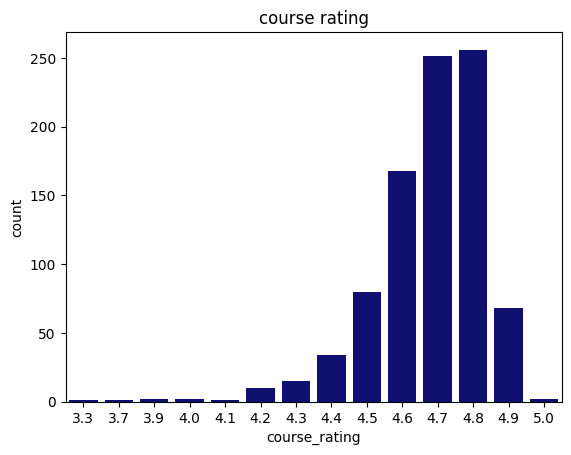

In [10]:
sns.countplot(x='course_rating',data=df,color='navy')
plt.title('course rating')
plt.ylabel('count')
plt.subplots_adjust(wspace=1)
plt.show()

*Thống kê về mức đánh giá của các khóa học*
<p style="color:blue"> Mức phân phối của course rating so với giá trị trung bình (4,7):
    <ul style="color:blue">
        <li> Khá cao so với 2 rìa (min và max) </li>
        <li> Đa phần các khóa học được đánh giá khá cao </li>
    </ul>
 </p>

## Course certificate types

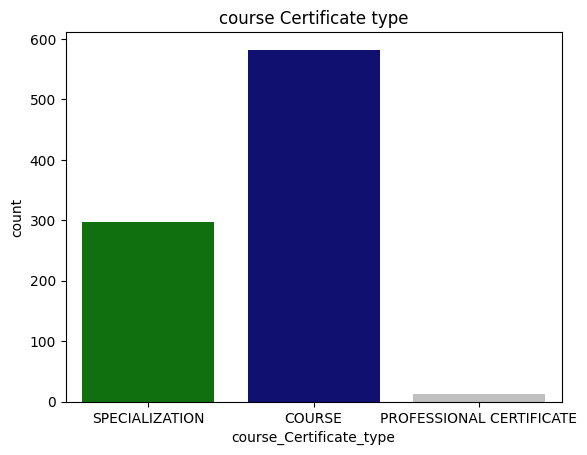

In [11]:
colours = ["green", "navy", "silver", "gold"]
sns.countplot(x='course_Certificate_type',data=df,palette=colours)
plt.title('course Certificate type')
plt.ylabel('count')
plt.subplots_adjust(wspace=1)
plt.show()

*Thống kê về chứng chỉ của các khóa học*
Có vẻ các chứng chỉ công nhận ngắn hạn khóa học 

## Course difficulty

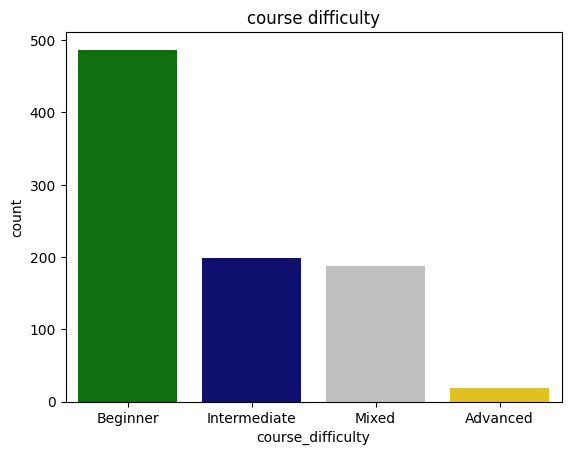

In [12]:
colours = ["green", "navy", "silver", "gold"]
sns.countplot(x='course_difficulty',data=df,palette=colours)
plt.title('course difficulty')
plt.ylabel('count')
plt.subplots_adjust(wspace=1)
plt.show()

*Thống kê về độ khó của các khóa học*

<span style="color:#35c454; font-size:30px; font-weight:bold">Phân phối Course rating trên mỗi course type khác nhau</span>


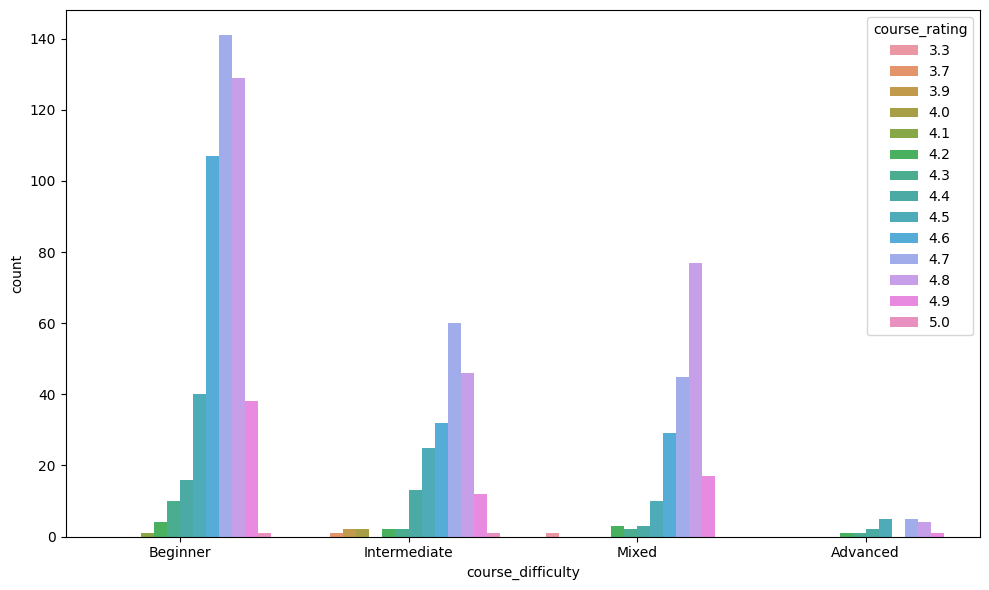

In [13]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x='course_difficulty',data=df,hue='course_rating' )
plt.tight_layout()
plt.show()

*course rating theo mỗi course difficulty*

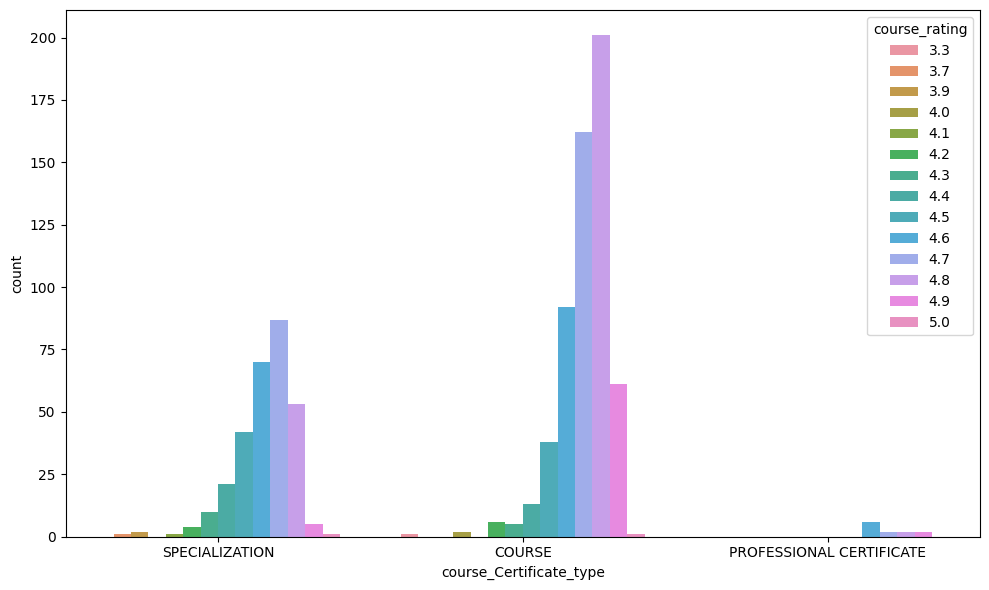

In [14]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x='course_Certificate_type',data=df,hue='course_rating' )
plt.tight_layout()
plt.show()

*course rating theo mỗi course Certificate type*

<h2> Có một số câu hỏi liên quan đến tập dữ liệu ta có thể phân tích như :</h2>
<ul>
    <li> Có mối quan hệ gì giữa độ khó của khóa học và số học viên đăng ký khóa học không ?</li>
    <li> Liệu có khóa học nào đó có rating thấp nhưng lại có số học viên đăng ký nhiều không ? Nếu có thì tại sao ?</li>
    <li> Xu hướng dạy học trực tuyến (có nhiều sự quan tâm đến lĩnh vực nào) ?</li>
</ul>

<p>Tìm hiểu về mối quan hệ giữa giữa độ khó của khóa học và số học viên đăng ký khóa học</p>

([<matplotlib.patches.Wedge at 0x17fd8c1aa40>,
 [Text(-0.16038429647467536, 1.0882448609776771, 'Beginner'),
  Text(-0.6028388380788988, -0.920100720195177, 'Intermediate'),
  Text(0.7716222600749743, -0.7839637030863029, 'Mixed'),
  Text(1.0975325182978188, -0.0736367522290899, 'Advanced')],
 [Text(-0.0874823435316411, 0.5935881059878237, '54.7%'),
  Text(-0.328821184406672, -0.5018731201064601, '22.2%'),
  Text(0.42088486913180406, -0.4276165653198015, '21.0%'),
  Text(0.5986541008897193, -0.04016550121586721, '2.1%')])

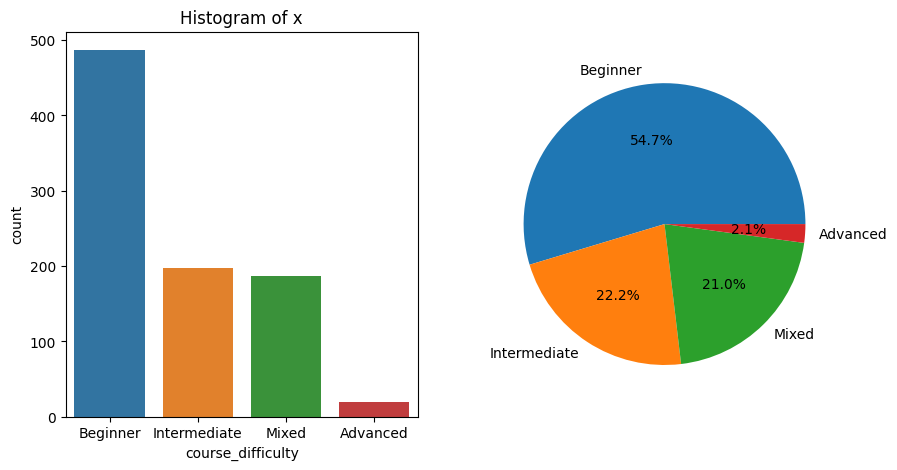

In [15]:
labels = df['course_difficulty'].unique()
counts = df['course_difficulty'].value_counts()
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

sns.countplot(data=df, x="course_difficulty" , ax=axs[0])
axs[0].set_title('Histogram of x')

plt.pie(x=counts, labels=labels, autopct="%.1f%%")

<p>Sơ lược ,ta có thể thấy số khóa học ở mức độ beginner rất nhiều , chiếm đến 50% tất cả các khóa học</p>
<p>Có thể các trung tâm , tổ chức tập trung tạo các khóa học ở mức độ beginner bởi vì nhu cầu ở mức này cao </p>


<BarContainer object of 891 artists>

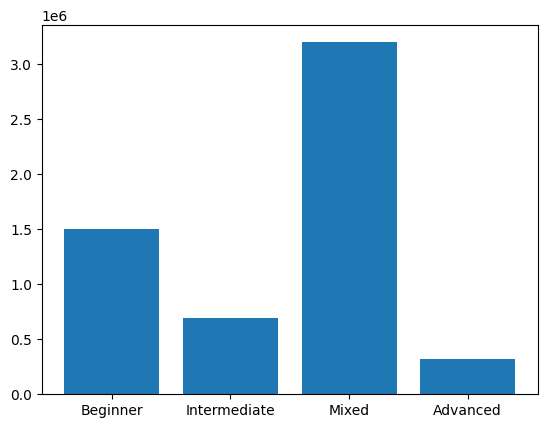

In [16]:
plt.bar(df['course_difficulty'], df['course_students_enrolled'])


Mặc dù các khóa beginner chiếm tỉ lệ lớn nhất nhưng số học viên đăng ký lại không ấn tượng , Bên cạnh đó sô lượng học viên đăng ký khóa học với độ khó Mixed lại cao nhất mặc dù chỉ chiếm 21% tổng các khóa học
Lý do có thể bởi vì :
- Người học muốn khóa học có thể bao quát các kiến thức ở nhiều mức độ
- Có thể có sự ảnh hưởng từ các tổ chức dạy học nổi tiếng 
- Có sự ảnh hưởng của rating từ người học


In [17]:
a =df['course_organization'].value_counts()
a[a > 10]

University of Pennsylvania                    59
University of Michigan                        41
Google Cloud                                  34
Johns Hopkins University                      28
Duke University                               28
University of California, Irvine              27
IBM                                           22
University of Illinois at Urbana-Champaign    22
University of California, Davis               21
University of Colorado Boulder                19
University of Virginia                        19
Yale University                               17
Stanford University                           16
deeplearning.ai                               16
Universidad Nacional Autónoma de México       14
Berklee College of Music                      14
Rice University                               13
University of Colorado System                 13
University of Toronto                         11
University of Minnesota                       11
University of Albert

In [18]:
df['course_rating']

0      4.7
1      4.7
2      4.5
3      4.7
4      4.8
      ... 
886    4.5
887    4.8
888    4.5
889    4.6
890    4.7
Name: course_rating, Length: 891, dtype: float64

                                             course_students_enrolled  \
course_organization                                                     
Universidad de los Andes                                       305400   
The University of Chicago                                      168000   
Universidade de São Paulo                                      205500   
Nanyang Technological University, Singapore                     47000   
London Business School                                          57000   
Crece con Google                                                 8800   
Universidade Estadual de Campinas                               17000   
Google - Spectrum Sharing                                      210000   
ScrumTrek                                                       12000   
Hebrew University of Jerusalem                                  95000   

                                             course_rating  
course_organization                                         
U

<AxesSubplot: xlabel='course_students_enrolled', ylabel='course_rating'>

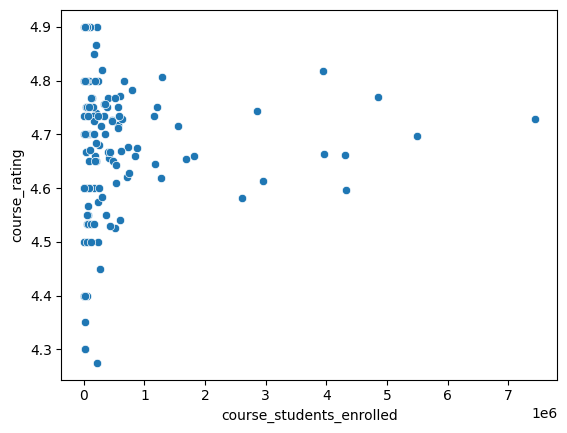

In [19]:
a =df['course_organization'].value_counts()
enroll_by_organization = df.groupby('course_organization').agg({'course_students_enrolled': 'sum', 'course_rating': 'mean'})

print(enroll_by_organization.sort_values('course_rating').tail(10))
sns.scatterplot(data=enroll_by_organization , x='course_students_enrolled' , y = 'course_rating')


Ta thấy không có sự tương quan rõ rệt đối với việc quyết định đăng kí các khóa học dựa trên mức độ rating của tổ chức dạy học. Có thể là:
- Người đăng kí học phần lớn chỉ quyết định dựa trên đánh giá về mức rating của khóa học mà họ chọn
- Mức rating của tổ chức dạy học được thu thập dựa vào trung bình dữ liệu rating của các khóa học của tổ chức đó nên không được chính xác:

        - số lượng các khóa học của tổ chức ít nhiều khác nhau

        - Các khóa học của cùng 1 tổ chức có mức độ rating bất thường

        -> Sai lệch khi tính giá trị trung bình để so sánh


<span style="color:#35c454; font-size:40px; font-weight:bold">Biểu đồ kết hợp giữa course_dificulty và course_Certificate_type</span>


In [20]:
ls_course_Certificate_type = list(set(df['course_Certificate_type']))
ls_course_difficulty = list(set(df['course_difficulty']))
print(ls_course_difficulty)

['Beginner', 'Mixed', 'Intermediate', 'Advanced']


[Text(0, 0.5, 'Beginner'),
 Text(0, 1.5, 'Mixed'),
 Text(0, 2.5, 'Intermediate'),
 Text(0, 3.5, 'Advanced')]

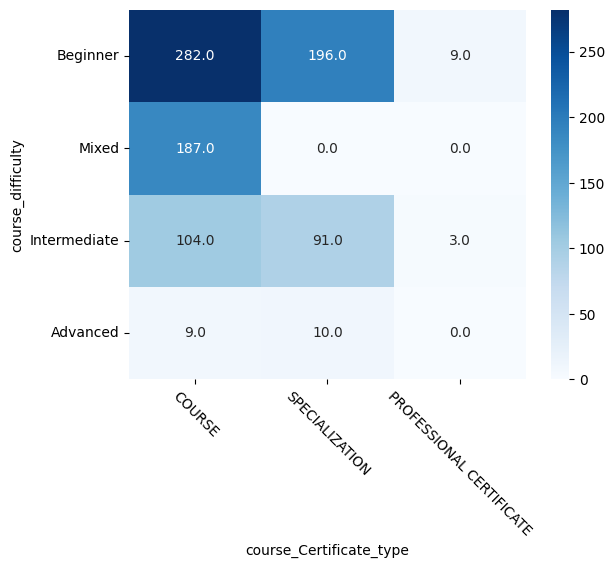

In [21]:
df_pivot_cert_difficult = df[['course_Certificate_type', 'course_difficulty']].pivot_table(
        index='course_difficulty', columns='course_Certificate_type',
        aggfunc=len, fill_value=0)
df_pivot_cert_difficult = df_pivot_cert_difficult.loc[ls_course_difficulty,  ls_course_Certificate_type]
ax = sns.heatmap(df_pivot_cert_difficult, annot=True, fmt="1.1f",cmap="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)



**Các mẫu Professional certification và Advanced có khá ít phân phối (Xu hướng học khá ít, thường chỉ cho những người đã học lâu năm và có đủ kiến thức nền tảng, chủ yếu là dành cho begginer và mixed đăng kí)**

<span style="color:#35c454; font-size:40px; font-weight:bold">Biểu đồ tương quan giữa các đặc trưng</span>


In [22]:
def course_difficulty_modifier(x):
    if x=="Beginner":
        return "0"
    elif x=="Mixed":
        return "0.5"
    elif x=="Intermediate":
        return "1"
    elif x=="Advanced":
        return "2"
    else:
        return "0"
        
def course_Certificate_type_modifier(x):
    if x=="SPECIALIZATION":
        return "2"
    elif x=="PROFESSIONAL CERTIFICATE":
        return "1"
    elif x=="COURSE":
        return "0"
    else:
        return "0"    

In [24]:
df_copy = df.copy()

df_copy['course_difficulty_modifier']=df_copy['course_difficulty'].apply(course_difficulty_modifier)
df_copy['course_difficulty_modifier']=df_copy['course_difficulty_modifier'].apply(pd.to_numeric)
df_copy['course_Certificate_type_modifier']=df_copy['course_Certificate_type'].apply(course_Certificate_type_modifier)
df_copy['course_Certificate_type_modifier']=df_copy['course_Certificate_type_modifier'].apply(pd.to_numeric)
df_copy = df_copy.select_dtypes(include=np.number)
df_copy

,course_rating,course_students_enrolled,course_difficulty_modifier,course_Certificate_type_modifier
0,4.7,5300,0.0,2
1,4.7,17000,1.0,0
2,4.5,130000,0.5,0
3,4.7,91000,0.5,0
4,4.8,320000,0.5,0
...,...,...,...,...
886,4.5,52000,1.0,2
887,4.8,21000,0.5,0
888,4.5,30000,1.0,2
889,4.6,9800,1.0,2


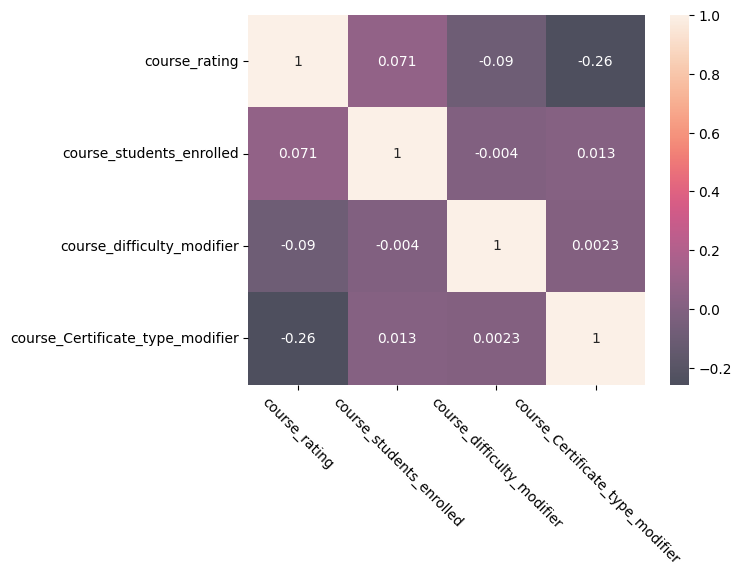

In [ ]:
ax = sns.heatmap(df_copy.corr(), annot=True, alpha=0.7)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)
plt.show()

In [ ]:
df['course_organization'].value_counts().head(10)

University of Pennsylvania                    59
University of Michigan                        41
Google Cloud                                  34
Johns Hopkins University                      28
Duke University                               28
University of California, Irvine              27
IBM                                           22
University of Illinois at Urbana-Champaign    22
University of California, Davis               21
University of Colorado Boulder                19
Name: course_organization, dtype: int64

<span style=" font-size:30px; font-weight:bold"> Sự phân bố giữa course rating với course_students_enrolled theo chứng chỉ </span>

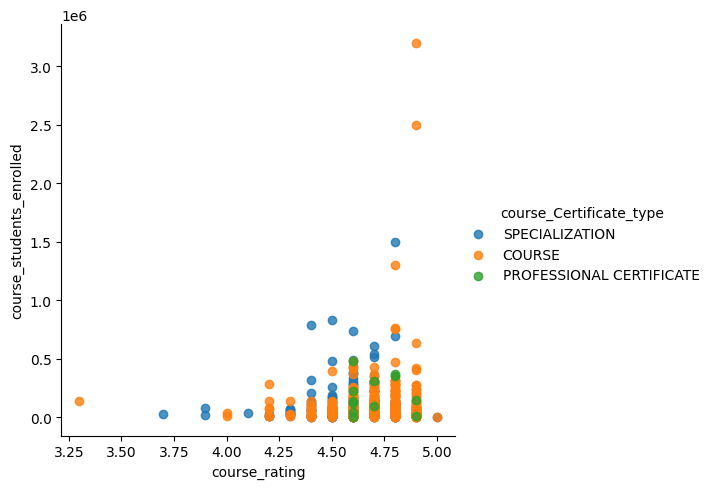

In [ ]:
sns.lmplot(x='course_rating',y='course_students_enrolled',
           data=df,fit_reg=False,hue='course_Certificate_type')

**Số lượng người học đăng kí vào các khóa có rating cao và chứng chỉ mức COURSE (thấp nhất) là phổ biến**